In [1]:
import numpy as np
x_test = np.load('/home/jovyan/Edge-IIoT/x_test.npy')
x_train = np.load('/home/jovyan/Edge-IIoT/x_train.npy')
x_val = np.load('/home/jovyan/Edge-IIoT/x_val.npy')
y_test = np.load('/home/jovyan/Edge-IIoT/y_test.npy')
y_train = np.load('/home/jovyan/Edge-IIoT/y_train.npy')
y_val = np.load('/home/jovyan/Edge-IIoT/y_val.npy')

In [2]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def printmatrix(x_test_adv, y_test, classifier, model_name, attack_name, epsilon):
    # preds = np.argmax(classifier.predict(x_test_adv), axis=1)
    preds = classifier.predict(x_test_adv)

    y_hat = preds
    # y_test_arg = np.argmax(y_test, axis=1)
    y_test_arg = y_test
    conf_matrix = confusion_matrix(y_test_arg, y_hat)
    cm = conf_matrix
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    accuracy = accuracy_score(y_test_arg, y_hat)
    precision_macro = precision_score(y_test_arg, y_hat, average='macro')
    precision_micro = precision_score(y_test_arg, y_hat, average='micro')
    precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
    f1_macro = f1_score(y_test_arg, y_hat, average='macro')
    f1_micro = f1_score(y_test_arg, y_hat, average='micro')
    f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
    recall_macro = recall_score(y_test_arg, y_hat, average='macro')
    recall_micro = recall_score(y_test_arg, y_hat, average='micro')
    recall_weighted = recall_score(y_test_arg, y_hat, average='weighted')

    # auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
    print(f"epsilon = {epsilon}")
    print(f"FPR: {fpr}")
    print(f"TPR: {tpr}")
    print(f"FNR: {fnr}")
    print(f"TNR: {tnr}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
    print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
    print(f"Recall(micro,macro,weighted: {recall_micro},{recall_macro},{recall_weighted}")

    # print(f"AUC: {auc}")
    
    print(f"FPR: {np.mean(fpr)}")
    print(f"tpr: {np.mean(tpr)}")
    print(f"fnr: {np.mean(fnr)}")
    print(f"tnr: {np.mean(tnr)}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()
    
    metrics = {
        "model" : model_name,
        "attack_model" : attack_name,
        "epsilon" : epsilon,
        "Accuracy": accuracy,
        "Precision-micro": precision_micro,
        "Precision-macro": precision_macro,
        "Precision-weighted": precision_weighted,
        "F1-micro": f1_micro,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "Recall_micro": recall_micro,
        "Recall_macro": recall_macro,
        "Recall_weighted": recall_weighted,
        "FPR": np.mean(fpr),
        "TPR": np.mean(tpr),
        "FNR": np.mean(fnr),
        "TNR": np.mean(tnr),
        # "AUC": auc
    }
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv("/home/jovyan/Edge-IIoT/attackmodel.csv", mode='a', index=False)

In [3]:
import joblib
import tensorflow as tf
from art.estimators.classification import TensorFlowV2Classifier

model = joblib.load("/home/jovyan/Edge-IIoT/pre_train/KNN.joblib")

# Wrap the model
classifier = TensorFlowV2Classifier(model=model, nb_classes=4,
    input_shape=(52,),
    loss_object=tf.keras.losses.SparseCategoricalCrossentropy(),)

2024-04-09 20:28:14.176241: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-09 20:28:14.180159: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-09 20:28:14.215086: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-09 20:28:15.252392: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


epsilon = 0.01
FPR: [0.00675845 0.         0.02199282 0.        ]
TPR: [0.71345029 1.         0.98606811 1.        ]
FNR: [0.28654971 0.         0.01393189 0.        ]
TNR: [0.99324155 1.         0.97800718 1.        ]
Accuracy: 0.9817570811329813
Precision(micro,macro,weighted): 0.9817570811329813,0.9484479865771812,0.9809321706238099
F1(micro,macro,weighted: 0.9817570811329813,0.9357507054899948,0.981181461583879
Recall(micro,macro,weighted: 0.9817570811329813,0.9248796009631922,0.9817570811329813
FPR: 0.0071878166828823285
tpr: 0.9248796009631922
fnr: 0.0751203990368077
tnr: 0.9928121833171177


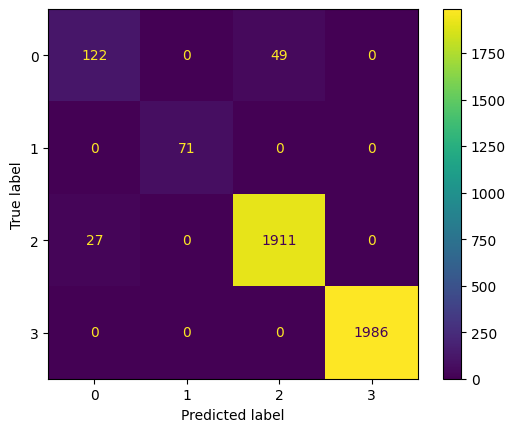

epsilon = 0.1
FPR: [0.00801001 0.         0.02244165 0.        ]
TPR: [0.70760234 1.         0.98348813 1.        ]
FNR: [0.29239766 0.         0.01651187 0.        ]
TNR: [0.99198999 1.         0.97755835 1.        ]
Accuracy: 0.9803168506961114
Precision(micro,macro,weighted): 0.9803168506961114,0.9413218252536188,0.9795236238158986
F1(micro,macro,weighted: 0.9803168506961114,0.9314638855599309,0.9798155891896992
Recall(micro,macro,weighted: 0.9803168506961114,0.9227726178190575,0.9803168506961114
FPR: 0.007612916055302521
tpr: 0.9227726178190575
fnr: 0.07722738218094255
tnr: 0.9923870839446974


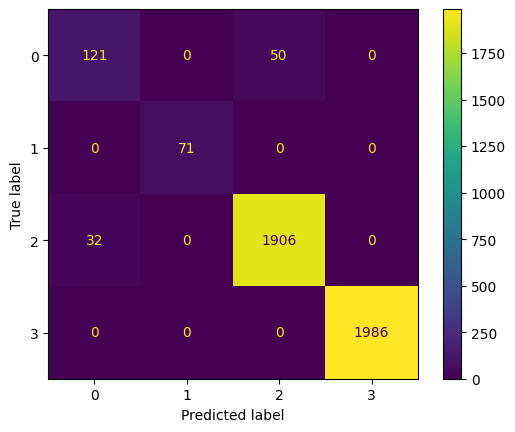

epsilon = 0.2
FPR: [0.00901126 0.         0.02154399 0.        ]
TPR: [0.71929825 1.         0.98142415 1.        ]
FNR: [0.28070175 0.         0.01857585 0.        ]
TNR: [0.99098874 1.         0.97845601 1.        ]
Accuracy: 0.9798367738838214
Precision(micro,macro,weighted): 0.9798367738838214,0.9372423802612482,0.9792554977156287
F1(micro,macro,weighted: 0.9798367738838214,0.9309624017957352,0.9795012858623036
Recall(micro,macro,weighted: 0.9798367738838214,0.9251805985552115,0.9798367738838214
FPR: 0.007638812429360759
tpr: 0.9251805985552115
fnr: 0.07481940144478844
tnr: 0.9923611875706393


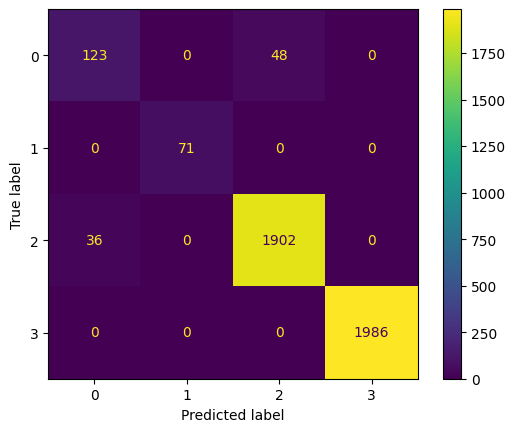

epsilon = 0.3
FPR: [0.00600751 0.         0.02289048 0.        ]
TPR: [0.70175439 1.         0.9876161  1.        ]
FNR: [0.29824561 0.         0.0123839  0.        ]
TNR: [0.99399249 1.         0.97710952 1.        ]
Accuracy: 0.9819971195391263
Precision(micro,macro,weighted): 0.9819971195391263,0.9518447837150128,0.9810851568311999
F1(micro,macro,weighted: 0.9819971195391263,0.9356721935507485,0.9812878372826904
Recall(micro,macro,weighted: 0.9819971195391263,0.9223426212590299,0.9819971195391263
FPR: 0.007224498531602564
tpr: 0.9223426212590299
fnr: 0.07765737874097006
tnr: 0.9927755014683974


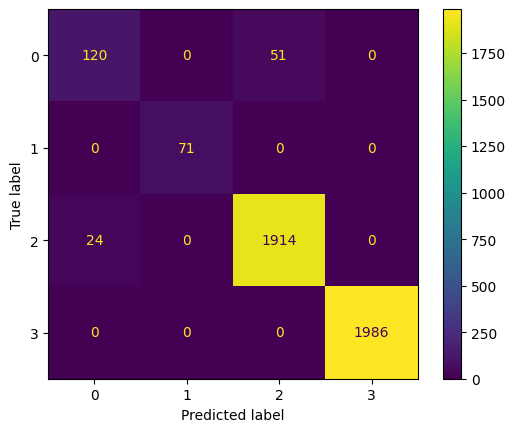

In [4]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Edge-IIoT/transfer_attackmodel/x_test_adv_FGSM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "KNN", "FGSM", epsilon)

epsilon = 0.01
FPR: [0.00650814 0.         0.02199282 0.        ]
TPR: [0.71345029 1.         0.98658411 1.        ]
FNR: [0.28654971 0.         0.01341589 0.        ]
TNR: [0.99349186 1.         0.97800718 1.        ]
Accuracy: 0.9819971195391263
Precision(micro,macro,weighted): 0.9819971195391263,0.9498342682304947,0.9811651863278237
F1(micro,macro,weighted: 0.9819971195391263,0.9364136451674371,0.9814012119086236
Recall(micro,macro,weighted: 0.9819971195391263,0.9250085999312005,0.9819971195391263
FPR: 0.007125238460103855
tpr: 0.9250085999312005
fnr: 0.07499140006879945
tnr: 0.9928747615398962


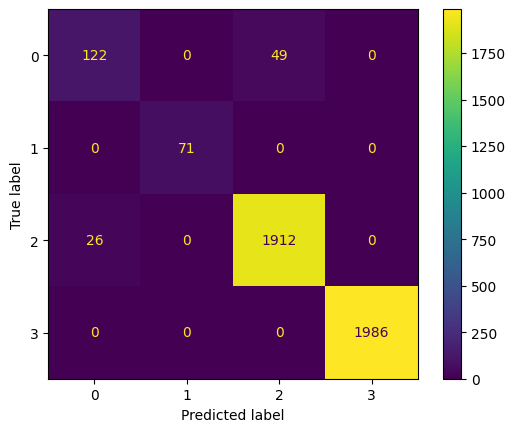

epsilon = 0.1
FPR: [0.00675845 0.         0.02154399 0.        ]
TPR: [0.71929825 1.         0.98606811 1.        ]
FNR: [0.28070175 0.         0.01393189 0.        ]
TNR: [0.99324155 1.         0.97845601 1.        ]
Accuracy: 0.9819971195391263
Precision(micro,macro,weighted): 0.9819971195391263,0.9488744257274119,0.9812132857030479
F1(micro,macro,weighted: 0.9819971195391263,0.9367773916672062,0.9814567468780371
Recall(micro,macro,weighted: 0.9819971195391263,0.9263415892672858,0.9819971195391263
FPR: 0.007075608424354501
tpr: 0.9263415892672858
fnr: 0.07365841073271413
tnr: 0.9929243915756455


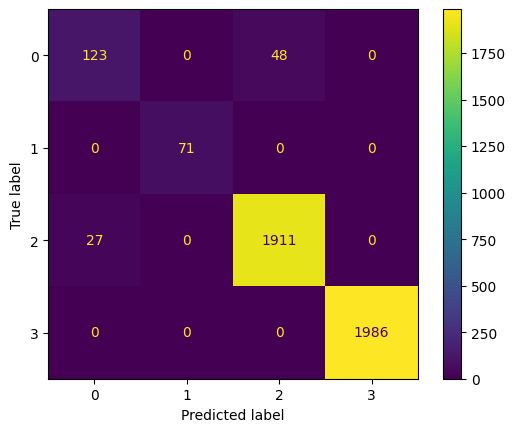

epsilon = 0.2
FPR: [0.00951189 0.         0.02109515 0.        ]
TPR: [0.7251462  1.         0.98039216 1.        ]
FNR: [0.2748538  0.         0.01960784 0.        ]
TNR: [0.99048811 1.         0.97890485 1.        ]
Accuracy: 0.9795967354776765
Precision(micro,macro,weighted): 0.9795967354776765,0.9353230991649071,0.9791421378319349
F1(micro,macro,weighted: 0.9795967354776765,0.9307164307164307,0.9793446488117636
Recall(micro,macro,weighted: 0.9795967354776765,0.9263845889232886,0.9795967354776765
FPR: 0.007651760616389877
tpr: 0.9263845889232886
fnr: 0.07361541107671138
tnr: 0.9923482393836102


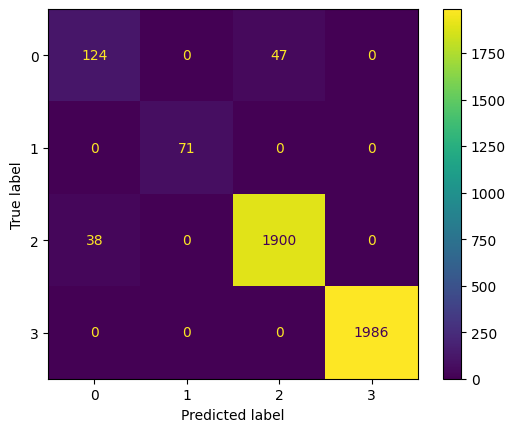

epsilon = 0.3
FPR: [0.00550688 0.         0.02289048 0.        ]
TPR: [0.70175439 1.         0.98864809 1.        ]
FNR: [0.29824561 0.         0.01135191 0.        ]
TNR: [0.99449312 1.         0.97710952 1.        ]
Accuracy: 0.9824771963514163
Precision(micro,macro,weighted): 0.9824771963514163,0.9547856534223133,0.9815792003624708
F1(micro,macro,weighted: 0.9824771963514163,0.9370197952162584,0.9817305025450543
Recall(micro,macro,weighted: 0.9824771963514163,0.9226006191950464,0.9824771963514163
FPR: 0.007099342086045618
tpr: 0.9226006191950464
fnr: 0.07739938080495355
tnr: 0.9929006579139544


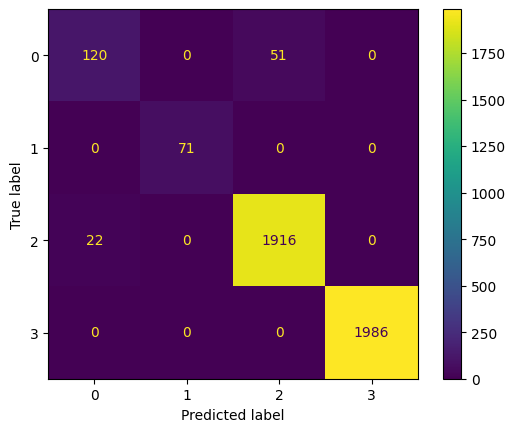

In [5]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Edge-IIoT/transfer_attackmodel/x_test_adv_BIM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "KNN", "BIM", epsilon)

epsilon = 0.01
FPR: [0.06357947 0.06129426 0.91517056 0.05183486]
TPR: [0.0877193  0.02816901 0.76986584 0.        ]
FNR: [0.9122807  0.97183099 0.23013416 1.        ]
TNR: [0.93642053 0.93870574 0.08482944 0.94816514]
Accuracy: 0.36221795487277963
Precision(micro,macro,weighted): 0.36221795487277963,0.12155260225565917,0.1989883055430212
F1(micro,macro,weighted: 0.36221795487277963,0.15653706720400815,0.25682877808981014
Recall(micro,macro,weighted: 0.36221795487277963,0.22143853835084812,0.36221795487277963
FPR: 0.27296978864386834
tpr: 0.22143853835084812
fnr: 0.7785614616491519
tnr: 0.7270302113561318


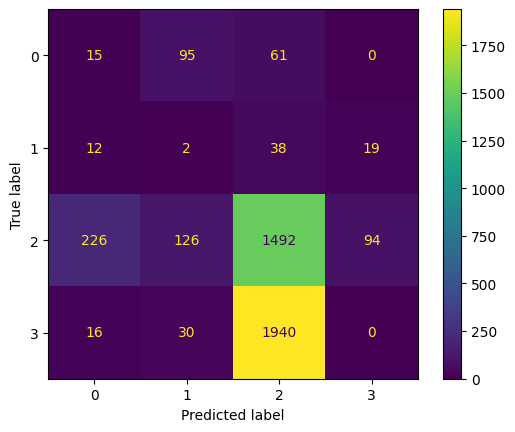

epsilon = 0.1
FPR: [0.06508135 0.05738706 0.91741472 0.0440367 ]
TPR: [0.08187135 0.02816901 0.78173375 0.        ]
FNR: [0.91812865 0.97183099 0.21826625 1.        ]
TNR: [0.93491865 0.94261294 0.08258528 0.9559633 ]
Accuracy: 0.3674987998079693
Precision(micro,macro,weighted): 0.3674987998079693,0.1213037700620068,0.2002656936452776
F1(micro,macro,weighted: 0.3674987998079693,0.1567795280186922,0.2592237459150837
Recall(micro,macro,weighted: 0.3674987998079693,0.22294352631094444,0.3674987998079693
FPR: 0.2709799570119737
tpr: 0.22294352631094444
fnr: 0.7770564736890555
tnr: 0.7290200429880263


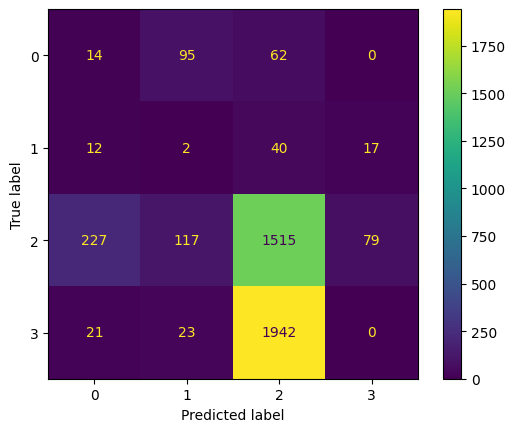

epsilon = 0.2
FPR: [0.06708385 0.05250305 0.91965889 0.03899083]
TPR: [0.07017544 0.02816901 0.79205366 0.        ]
FNR: [0.92982456 0.97183099 0.20794634 1.        ]
TNR: [0.93291615 0.94749695 0.08034111 0.96100917]
Accuracy: 0.371819491118579
Precision(micro,macro,weighted): 0.371819491118579,0.12009153585829493,0.2011554587789346
F1(micro,macro,weighted: 0.3718194911185789,0.15576548818277028,0.26104955993967277
Recall(micro,macro,weighted: 0.371819491118579,0.2225995290629224,0.371819491118579
FPR: 0.2695591549759311
tpr: 0.2225995290629224
fnr: 0.7774004709370775
tnr: 0.7304408450240689


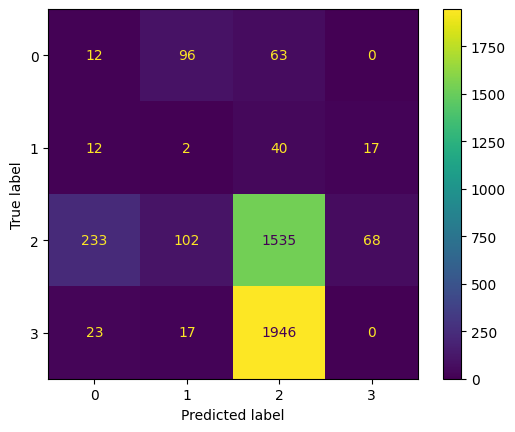

epsilon = 0.3
FPR: [0.06958698 0.04884005 0.92145422 0.0353211 ]
TPR: [0.07017544 0.02816901 0.79669763 0.        ]
FNR: [0.92982456 0.97183099 0.20330237 1.        ]
TNR: [0.93041302 0.95115995 0.07854578 0.9646789 ]
Accuracy: 0.3739798367738838
Precision(micro,macro,weighted): 0.3739798367738838,0.12013172370701164,0.20155034380283063
F1(micro,macro,weighted: 0.3739798367738838,0.15615424947206336,0.26192057305369937
Recall(micro,macro,weighted: 0.3739798367738838,0.22376051977499672,0.3739798367738838
FPR: 0.2688005881294157
tpr: 0.22376051977499672
fnr: 0.7762394802250033
tnr: 0.7311994118705842


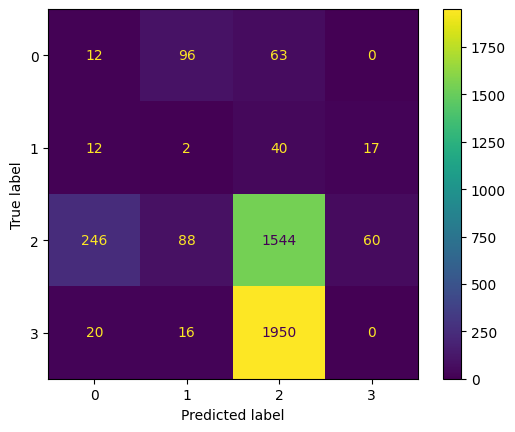

In [6]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Edge-IIoT/transfer_attackmodel/x_test_adv_DF_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "KNN", "DF", epsilon)

epsilon = 0.01
FPR: [0.00625782 0.         0.02154399 0.        ]
TPR: [0.71929825 1.         0.9871001  1.        ]
FNR: [0.28070175 0.         0.0128999  0.        ]
TNR: [0.99374218 1.         0.97845601 1.        ]
Accuracy: 0.9824771963514163
Precision(micro,macro,weighted): 0.9824771963514163,0.9516509433962265,0.981679751065117
F1(micro,macro,weighted: 0.9824771963514163,0.9381092812963053,0.9818971795910604
Recall(micro,macro,weighted: 0.9824771963514163,0.9265995872033024,0.9824771963514163
FPR: 0.006950451978797555
tpr: 0.9265995872033024
fnr: 0.07340041279669762
tnr: 0.9930495480212025


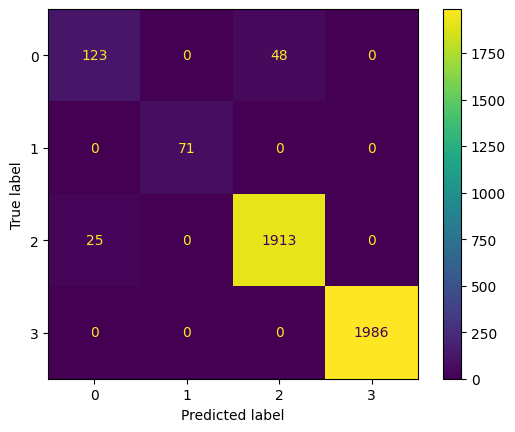

epsilon = 0.1
FPR: [0.00700876 0.         0.02154399 0.        ]
TPR: [0.71929825 1.         0.98555212 1.        ]
FNR: [0.28070175 0.         0.01444788 0.        ]
TNR: [0.99299124 1.         0.97845601 1.        ]
Accuracy: 0.9817570811329813
Precision(micro,macro,weighted): 0.9817570811329813,0.947513681348044,0.9809845623977701
F1(micro,macro,weighted: 0.9817570811329813,0.9361169921052968,0.9812373555980264
Recall(micro,macro,weighted: 0.9817570811329813,0.9262125902992776,0.9817570811329813
FPR: 0.007138186647132973
tpr: 0.9262125902992776
fnr: 0.0737874097007224
tnr: 0.992861813352867


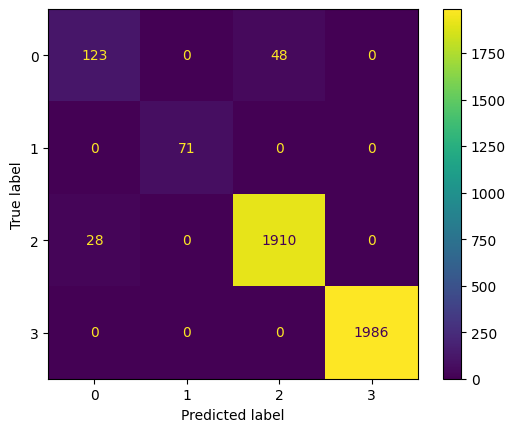

epsilon = 0.2
FPR: [0.00876095 0.         0.01974865 0.        ]
TPR: [0.74269006 1.         0.98194014 1.        ]
FNR: [0.25730994 0.         0.01805986 0.        ]
TNR: [0.99123905 1.         0.98025135 1.        ]
Accuracy: 0.9810369659145464
Precision(micro,macro,weighted): 0.9810369659145464,0.9403379368068634,0.9806190459400058
F1(micro,macro,weighted: 0.9810369659145464,0.9356070356070356,0.9808026736015214
Recall(micro,macro,weighted: 0.9810369659145464,0.931157550739594,0.9810369659145464
FPR: 0.007127401172470974
tpr: 0.931157550739594
fnr: 0.06884244926040592
tnr: 0.992872598827529


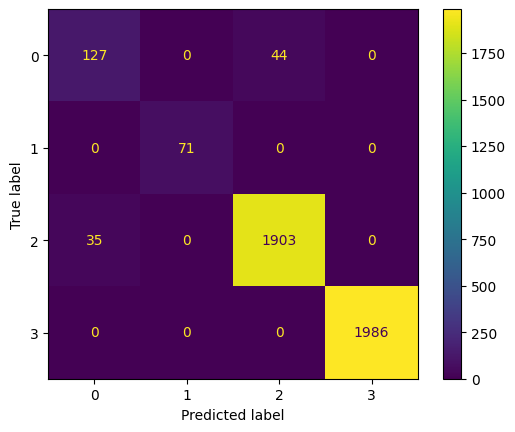

epsilon = 0.3
FPR: [0.00425532 0.         0.02199282 0.        ]
TPR: [0.71345029 1.         0.99122807 1.        ]
FNR: [0.28654971 0.         0.00877193 0.        ]
TNR: [0.99574468 1.         0.97800718 1.        ]
Accuracy: 0.9841574651944311
Precision(micro,macro,weighted): 0.9841574651944311,0.9632061863199795,0.9834090902596125
F1(micro,macro,weighted: 0.9841574651944311,0.942552085052993,0.9834046479430635
Recall(micro,macro,weighted: 0.9841574651944311,0.9261695906432748,0.9841574651944311
FPR: 0.006562034455097597
tpr: 0.9261695906432748
fnr: 0.07383040935672514
tnr: 0.9934379655449024


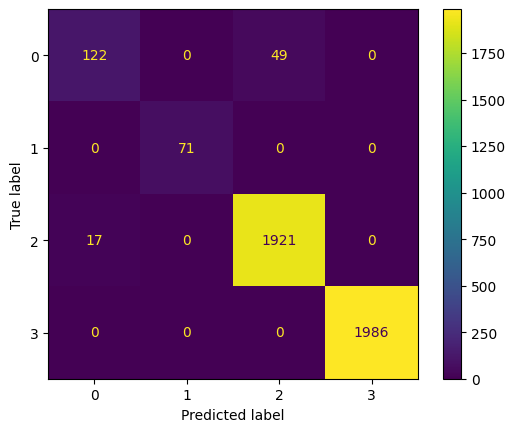

In [7]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Edge-IIoT/transfer_attackmodel/x_test_adv_PGD_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "KNN", "PDG", epsilon)